([], [])

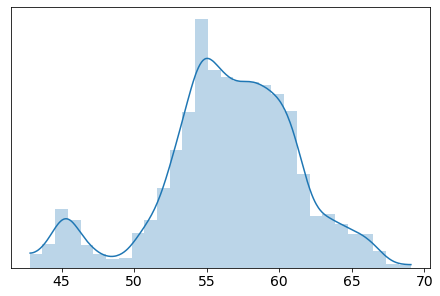

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import arviz as az

cs = pd.read_csv('../data/chemical_shifts_theo_exp.csv')
cs_exp = cs['exp']
az.plot_kde(cs_exp)
plt.hist(cs_exp, density=True, bins=30, alpha=0.3)
plt.yticks([])

In [4]:
clusters = 2
with pm.Model() as model_kg:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    z = pm.Categorical('z', p=p, shape=len(cs_exp))
    means = pm.Normal('means', mu=cs_exp.mean(), sd=10, shape=clusters)
    sd = pm.HalfNormal('sd', sd=10)
    y = pm.Normal('y', mu=means[z], sd=sd, observed=cs_exp)
    trace_kg = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [sd, means, p]
>BinaryGibbsMetropolis: [z]
Sampling 4 chains: 100%|██████████| 4000/4000 [13:48<00:00,  4.83draws/s]
The acceptance probability does not match the target. It is 0.9687004050921396, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9695040386359707, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9697332046631081, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8842126595812428, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


直接使用 PyMC3 中的高斯混合模型 NormalMixtue 如下：

In [ ]:
clusters = 2
with pm.Model() as model_mg:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    means = pm.Normal('means', mu=cs_exp.mean(), sd=10, shape=clusters)
    sd = pm.HalfNormal('sd', sd=10)
    y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=cs_exp)
    trace_mg = pm.sample(random_seed=123)

In [ ]:
varnames = ['means', 'p']
az.plot_trace(trace_mg, varnames)
az.summary(trace_mg, varnames)